In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [24]:
# Chemins vers les dossiers contenant les images d'entraînement et de validation
train_dir = r"C:\Users\anass\OneDrive\Bureau\Animal Images"
valid_dir = r"C:\Users\anass\OneDrive\Bureau\Animal Images"

# Paramètres du modèle
input_shape = (150, 150, 3)  # Taille des images (largeur, hauteur, canaux)
num_classes = 2  # Chiens et chats

# Création du modèle
model = Sequential([http://localhost:8888/notebooks/Documents/ImageClassification.ipynb#
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augmentation de données pour éviter le surapprentissage
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

# Entraînement du modèle
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # Nombre d'itérations par époque
    epochs=10,            # Nombre d'époques
    validation_data=valid_generator,
    validation_steps=50   # Nombre d'itérations de validation par époque
)


Found 30061 images belonging to 2 classes.
Found 30061 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 55s 527ms/step - loss: 0.7543 - accuracy: 0.5070 - val_loss: 0.6932 - val_accuracy: 0.5020
Epoch 2/10
100/100 [==============================] - 51s 511ms/step - loss: 0.6934 - accuracy: 0.4820 - val_loss: 0.6933 - val_accuracy: 0.4830
Epoch 3/10
100/100 [==============================] - 51s 512ms/step - loss: 0.6933 - accuracy: 0.4965 - val_loss: 0.6932 - val_accuracy: 0.4990
Epoch 4/10
100/100 [==============================] - 51s 507ms/step - loss: 0.6927 - accuracy: 0.5175 - val_loss: 0.6941 - val_accuracy: 0.4790
Epoch 5/10
100/100 [==============================] - 82s 822ms/step - loss: 0.6943 - accuracy: 0.5265 - val_loss: 0.6930 - val_accuracy: 0.5090
Epoch 6/10
100/100 [==============================] - 51s 510ms/step - loss: 0.6938 - accuracy: 0.4995 - val_loss: 0.6935 - val_accuracy: 0.4940
Epoch 7/10
100/100 [========================

In [3]:
# Après avoir entraîné le modèle

# Définir le chemin complet où vous souhaitez enregistrer le modèle
model_save_path = r'C:\Users\anass\OneDrive\Bureau\Anass Project\Models DL\CNNNN.h5'

# Enregistrer le modèle
model.save(model_save_path)

print("Modèle enregistré avec succès.")


Modèle enregistré avec succès.


In [26]:
# Chemin vers le modèle enregistré
model_path = r'C:\Users\anass\OneDrive\Bureau\Anass Project\Models DL\CNNN.h5'

# Charger le modèle
loaded_model = load_model(model_path)

# Afficher le résumé du modèle
loaded_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

Epoch 1/10
100/100 [==============================] - 52s 512ms/step - loss: 0.6926 - accuracy: 0.5160 - val_loss: 0.6903 - val_accuracy: 0.5400
Epoch 2/10
100/100 [==============================] - 51s 506ms/step - loss: 0.6880 - accuracy: 0.5380 - val_loss: 0.6843 - val_accuracy: 0.5640
Epoch 3/10
100/100 [==============================] - 51s 508ms/step - loss: 0.6866 - accuracy: 0.5350 - val_loss: 0.6807 - val_accuracy: 0.5840
Epoch 4/10
100/100 [==============================] - 52s 515ms/step - loss: 0.6864 - accuracy: 0.5460 - val_loss: 0.6820 - val_accuracy: 0.5660
Epoch 5/10
100/100 [==============================] - 50s 504ms/step - loss: 0.6803 - accuracy: 0.5780 - val_loss: 0.6606 - val_accuracy: 0.5970
Epoch 6/10
100/100 [==============================] - 51s 505ms/step - loss: 0.6706 - accuracy: 0.6015 - val_loss: 0.6475 - val_accuracy: 0.6100
Epoch 7/10
100/100 [==============================] - 51s 506ms/step - loss: 0.6756 - accuracy: 0.5850 - val_loss: 0.6557 - val_ac

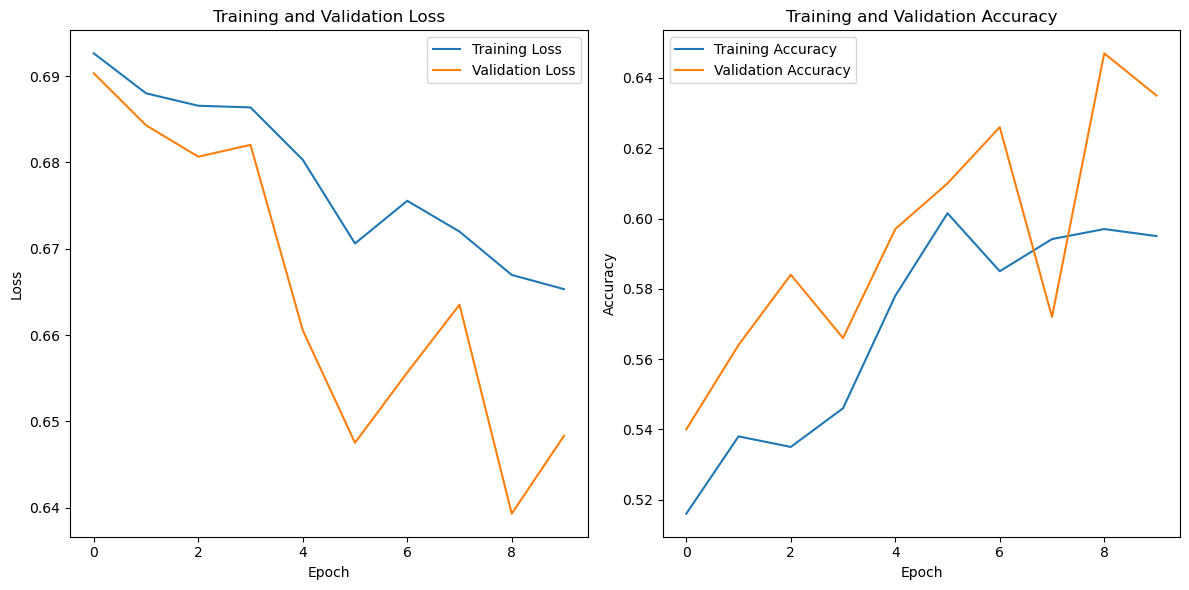

In [32]:
# Entraînement du modèle et obtention de l'objet history
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=50
)

# Affichage des courbes d'apprentissage
plt.figure(figsize=(12, 6))

# Loss (perte) sur les données d'entraînement et de validation
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Accuracy (précision) sur les données d'entraînement et de validation
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()


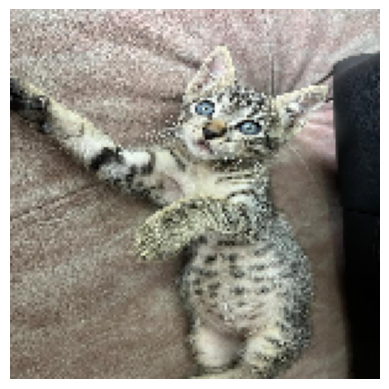

In [27]:
# Chemin vers l'image que vous souhaitez afficher
image_path = r"C:\Users\anass\Downloads\caaat.jpg"

# Chargement de l'image avec Keras
img = image.load_img(image_path, target_size=(150, 150))

# Conversion de l'image en tableau numpy
img_array = image.img_to_array(img)

# Affichage de l'image
plt.imshow(img_array / 255.0)  # Assurez-vous de normaliser les valeurs des pixels
plt.axis('off')  # Suppression des axes
plt.show()


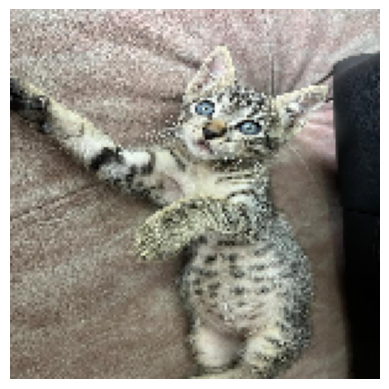

1/1 [==============================] - 0s 138ms/step
Classe prédite : Chat


In [28]:
# Chemin vers l'image que vous souhaitez afficher
image_path = r"C:\Users\anass\Downloads\caaat.jpg"

# Chargement de l'image avec Keras
img = image.load_img(image_path, target_size=(150, 150))

# Conversion de l'image en tableau numpy
img_array = image.img_to_array(img)

# Affichage de l'image
plt.imshow(img_array / 255.0)  # Assurez-vous de normaliser les valeurs des pixels
plt.axis('off')  # Suppression des axes
plt.show()


# Chargement du modèle entraîné
model_path = r'C:\Users\anass\OneDrive\Bureau\Anass Project\Models DL\CNNN.h5'
loaded_model = tf.keras.models.load_model(model_path)

# Chemin vers une nouvelle image à tester
image_path = r"C:\Users\anass\Downloads\caaat.jpg"
# Chargement et prétraitement de l'image
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Mise à l'échelle des valeurs des pixels

# Prédiction de la classe
prediction = loaded_model.predict(img_array)
class_index = np.argmax(prediction)
if class_index == 0:
    class_label = 'Chat'
else:
    class_label = 'Chien'

print(f"Classe prédite : {class_label}")



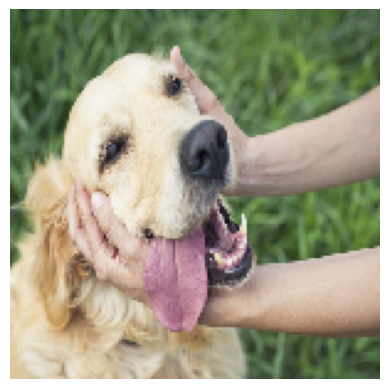

In [29]:
# Chemin vers l'image que vous souhaitez afficher
image_path = r"C:\Users\anass\OneDrive\Bureau\Anass Project\dataset\Cat and Dog\test\dogs\dog_181.jpg"

# Chargement de l'image avec Keras
img = image.load_img(image_path, target_size=(150, 150))

# Conversion de l'image en tableau numpy
img_array = image.img_to_array(img)

# Affichage de l'image
plt.imshow(img_array / 255.0)  # Assurez-vous de normaliser les valeurs des pixels
plt.axis('off')  # Suppression des axes
plt.show()



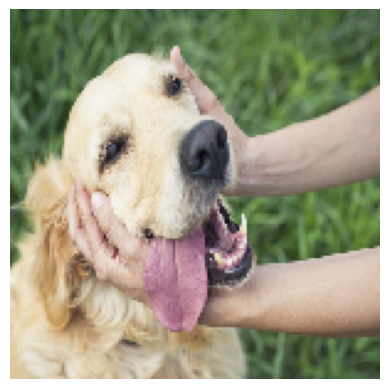

1/1 [==============================] - 0s 162ms/step
Classe prédite : Chien


In [30]:
# Chemin vers l'image que vous souhaitez afficher
image_path = r"C:\Users\anass\OneDrive\Bureau\Anass Project\dataset\Cat and Dog\test\dogs\dog_181.jpg"

# Chargement de l'image avec Keras
img = image.load_img(image_path, target_size=(150, 150))

# Conversion de l'image en tableau numpy
img_array = image.img_to_array(img)

# Affichage de l'image
plt.imshow(img_array / 255.0)  # Assurez-vous de normaliser les valeurs des pixels
plt.axis('off')  # Suppression des axes
plt.show()

# Chargement du modèle entraîné
model_path = r'C:\Users\anass\OneDrive\Bureau\Anass Project\Models DL\CNN.h5'
loaded_model = tf.keras.models.load_model(model_path)

# Chemin vers une nouvelle image à tester
image_path = r"C:\Users\anass\OneDrive\Bureau\Anass Project\dataset\Cat and Dog\test\dogs\dog_181.jpg"

# Chargement et prétraitement de l'image
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Mise à l'échelle des valeurs des pixels

# Prédiction de la classe
prediction = loaded_model.predict(img_array)
class_index = np.argmax(prediction)
if class_index == 0:
    class_label = 'Chat'
else:
    class_label = 'Chien'

print(f"Classe prédite : {class_label}")

1/1 [==============================] - 0s 48ms/step


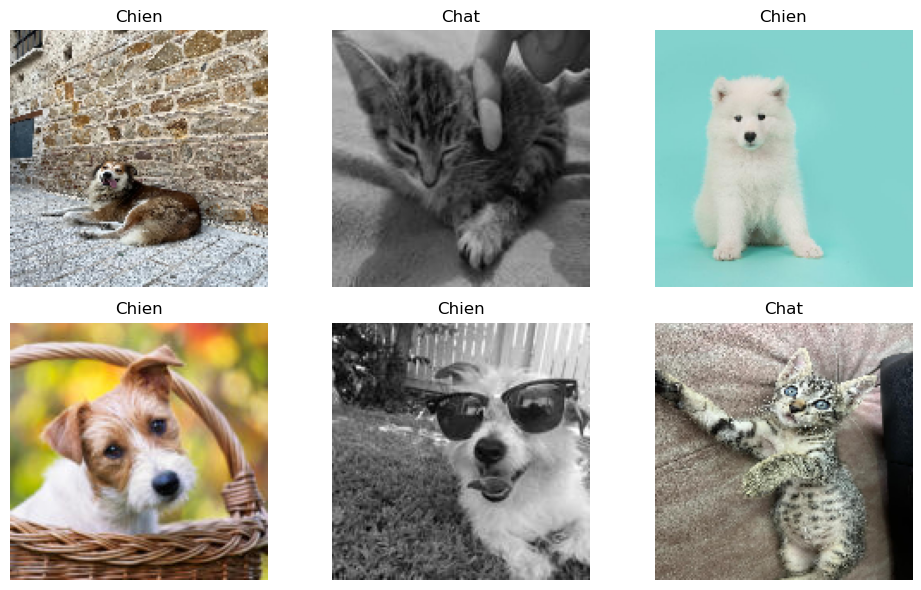

In [33]:
# Chargement du modèle entraîné
model_path = r'C:\Users\anass\OneDrive\Bureau\Anass Project\Models DL\CNN.h5'
loaded_model = tf.keras.models.load_model(model_path)

# Liste des chemins vers les images que vous souhaitez afficher
image_paths = [
    r"C:\Users\anass\Downloads\dooog.jpg",
   r"C:\Users\anass\OneDrive\Bureau\Animal Images\cats\2bd9e5f(1).jpg",
   r"C:\Users\anass\OneDrive\Bureau\Anass Project\dataset\Cat and Dog\train\dogs\dog_35.jpg",
   r"C:\Users\anass\Downloads\arrivee-nouveau-chien.jpg",
   r"C:\Users\anass\OneDrive\Bureau\Animal Images\dogs\2013-04-21_439203031841322411.jpg",
  r"C:\Users\anass\Downloads\caaat.jpg"
]

# Définir la disposition des images (2 lignes, 3 colonnes)
num_rows = 2
num_cols = 3
num_images = num_rows * num_cols

# Créer une figure et des sous-plots avec la disposition souhaitée
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

# Boucle pour afficher chaque image et appliquer le modèle
for i, ax in enumerate(axes.flat):
    if i < len(image_paths):
        # Chargement de l'image avec Keras
        img = image.load_img(image_paths[i], target_size=(150, 150))

        # Conversion de l'image en tableau numpy
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Mise à l'échelle des valeurs des pixels

        # Prédiction avec le modèle
        prediction = loaded_model.predict(img_array)
        class_index = np.argmax(prediction)
        if class_index == 0:
            class_label = 'Chat'
        else:
            class_label = 'Chien'

        # Affichage de l'image sur le subplot actuel
        ax.imshow(img_array[0])
        ax.set_title(class_label)
        ax.axis('off')

# Afficher la figure avec toutes les images
plt.tight_layout()
plt.show()

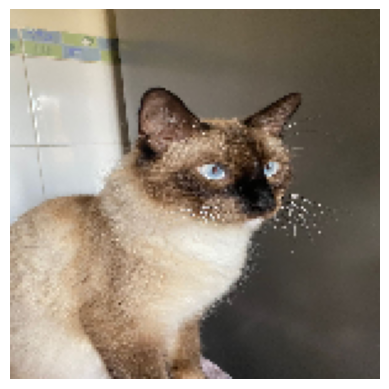

1/1 [==============================] - 0s 149ms/step
Classe prédite : Simba


In [5]:
# Chemin vers l'image que vous souhaitez afficher
image_path = r"C:\Users\anass\Downloads\ouma cayt.jpg"

# Chargement de l'image avec Keras
img = image.load_img(image_path, target_size=(150, 150))

# Conversion de l'image en tableau numpy
img_array = image.img_to_array(img)

# Affichage de l'image
plt.imshow(img_array / 255.0)  # Assurez-vous de normaliser les valeurs des pixels
plt.axis('off')  # Suppression des axes
plt.show()


# Chargement du modèle entraîné
model_path = r'C:\Users\anass\OneDrive\Bureau\Anass Project\Models DL\CNNN.h5'
loaded_model = tf.keras.models.load_model(model_path)

# Chemin vers une nouvelle image à tester
image_path = r"C:\Users\anass\Downloads\caaat.jpg"
# Chargement et prétraitement de l'image
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Mise à l'échelle des valeurs des pixels

# Prédiction de la classe
prediction = loaded_model.predict(img_array)
class_index = np.argmax(prediction)
if class_index == 0:
    class_label = 'Simba'
else:
    class_label = 'Chien'

print(f"Classe prédite : {class_label}")

